# Fragrance notes: Preprocessing / EDA

## Problem statement: Are fragrance notes good predictors of average customer ratings?

#### Library imports

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

from sklearn.preprocessing import StandardScaler

from mpl_toolkits.mplot3d import Axes3D

# Hide deprecation/ future warnings

import warnings; warnings.simplefilter('ignore')

# User-friendly formatting

from IPython.display import Markdown, display as ipd

pd.set_option('display.max_row', 200) # Set IPython's max row display
pd.set_option('display.max_columns', 85) # Set IPython's max column count
pd.set_option('display.max_colwidth', 1_000) # Set IPython's max column width

# pseudo-markdown in code cells
def printmd(string):
    ipd(Markdown(string))
# ref: https://discuss.analyticsvidhya.com/t/how-to-make-a-text-bold-within-print-statement-in-ipython-notebook/14552/2

#### About the dataset


I found this dataset on Kaggle with specifics on the fragrance components as well as user rating. See below info from the dataset provider.
* [Fragrances - Notes and User Rating](https://www.kaggle.com/sagikeren88/fragrances-and-perfumes) | `notes_and_user_ratings.csv`
>An enhanced dataset with scent breakdown, user ranking and segmentation and many more<br>
>Perfume notes are divided into 3 main notes - Top, Middle (Heart) and Base.

#### Read in the dataset

In [107]:
notes_ratings = pd.read_csv('../../capstone_scratch/global/datasets/notes_and_user_ratings.csv')
ipd(notes_ratings.head(1))
printmd('**`notes_ratings` shape:**')
notes_ratings.shape

,url,title,longevity_poor,longevity_weak,longevity_moderate,longevity_long,longevity_very_long,sillage_soft,sillage_moderate,sillage_heavy,sillage_enormous,perfume_id,clslove,clslike,clsdislike,clswinter,clsspring,clssummer,clsautumn,clscold,clshot,clsday,clsnight,people,clslove_female25under,clslove_male25under,clslove_female25older,clslove_male25older,clslike_female25under,clslike_male25under,clslike_female25older,clslike_male25older,clsdislike_female25under,clsdislike_male25under,clsdislike_female25older,clsdislike_male25older,clswinter_female25under,clswinter_male25under,clswinter_female25older,clswinter_male25older,clsspring_female25under,clsspring_male25under,...,martini,metallic,milky,mossy,musky,narcotic,nutty,oud,ozonic,patchouli,plastic,powdery,rose,rum,salty,sand,savory,smoky,soapy,soft spicy,sour,sweet,tennis ball,terpenic,tobacco,tonka (coumarin),tropical,tuberose,unknown,vanilla,vinyl,violet,vodka,warm spicy,watery,wet plaster,whiskey,white floral,white wine,wine,woody,yellow floral
0,https://www.fragrantica.com/perfume/The-Spirit-of-Dubai/Aamal-44152.html,Aamal The Spirit of Dubai for women and men,0,0,0,0,3,0,1,0,3,44152,100,1,1,50,50,50,50,0,0,50,50,3,1,1,1,100,1,1,1,1,1,1,1,1,1,100,1,1,1,100,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


**`notes_ratings` shape:**

(41905, 155)

## Check out the basic characteristics of the dataset 

In [108]:
printmd('**Column names**')
cols_notes_ratings = np.array(notes_ratings.columns)
cols_notes_ratings

**Column names**

array(['url', 'title', 'longevity_poor', 'longevity_weak',
       'longevity_moderate', 'longevity_long', 'longevity_very_long',
       'sillage_soft', 'sillage_moderate', 'sillage_heavy',
       'sillage_enormous', 'perfume_id', 'clslove', 'clslike',
       'clsdislike', 'clswinter', 'clsspring', 'clssummer', 'clsautumn',
       'clscold', 'clshot', 'clsday', 'clsnight', 'people',
       'clslove_female25under', 'clslove_male25under',
       'clslove_female25older', 'clslove_male25older',
       'clslike_female25under', 'clslike_male25under',
       'clslike_female25older', 'clslike_male25older',
       'clsdislike_female25under', 'clsdislike_male25under',
       'clsdislike_female25older', 'clsdislike_male25older',
       'clswinter_female25under', 'clswinter_male25under',
       'clswinter_female25older', 'clswinter_male25older',
       'clsspring_female25under', 'clsspring_male25under',
       'clsspring_female25older', 'clsspring_male25older',
       'clssummer_female25under', 'cl

In [109]:
notes_ratings.describe()

,longevity_poor,longevity_weak,longevity_moderate,longevity_long,longevity_very_long,sillage_soft,sillage_moderate,sillage_heavy,sillage_enormous,perfume_id,clslove,clslike,clsdislike,clswinter,clsspring,clssummer,clsautumn,clscold,clshot,clsday,clsnight,people,clslove_female25under,clslove_male25under,clslove_female25older,clslove_male25older,clslike_female25under,clslike_male25under,clslike_female25older,clslike_male25older,clsdislike_female25under,clsdislike_male25under,clsdislike_female25older,clsdislike_male25older,clswinter_female25under,clswinter_male25under,clswinter_female25older,clswinter_male25older,clsspring_female25under,clsspring_male25under,clsspring_female25older,clsspring_male25older,...,martini,metallic,milky,mossy,musky,narcotic,nutty,oud,ozonic,patchouli,plastic,powdery,rose,rum,salty,sand,savory,smoky,soapy,soft spicy,sour,sweet,tennis ball,terpenic,tobacco,tonka (coumarin),tropical,tuberose,unknown,vanilla,vinyl,violet,vodka,warm spicy,watery,wet plaster,whiskey,white floral,white wine,wine,woody,yellow floral
count,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,...,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000,41905.000000
mean,2.295454,2.998115,8.138695,7.910369,4.318983,5.940795,13.019115,8.180766,5.759456,25734.681375,65.719938,70.617015,29.888939,26.964968,38.376900,31.323303,35.259372,0.808997,0.809498,52.454027,33.207899,105.554445,7.928600,4.930939,33.867772,22.488677,9.522658,5.009784,39.583057,18.418351,4.736857,3.016275,16.117743,9.828732,2.795943,6.900561,10.816418,13.329436,4.430140,7.404940,16.225343,17.118554,...,0.000024,0.001742,0.010404,0.000573,0.193318,0.002983,0.010691,0.040091,0.034316,0.072283,0.000048,0.226465,0.166543,0.004319,0.007875,0.001217,0.002339,0.045484,0.004653,0.040377,0.016800,0.315475,0.000024,0.001837,0.017898,0.003866,0.026775,0.025081,0.012719,0.149720,0.000358,0.000549,0.000692,0.223816,0.001527,0.000024,0.002792,0.250352,0.000191,0.001169,0.546856,0.038540
std,7.272181,9.655673,30.716214,37.637801,24.921431,18.990463,47.289679,33.912306,21.259010,16398.910355,36.070871,35.461496,29.548864,28.507364,30.096368,29.822052,29.539934,5.048300,4.378074,31.839277,29.858856,398.416975,15.007792,10.767726,32.956296,30.631818,15.342282,11.075876,33.963985,26.424864,10.564349,8.211060,22.004788,18.574904,6.849236,18.894363,16.944519,22.929124,9.572257,19.037055,20.898556,25.269095,...,0.004885,0.041702,0.101472,0.023925,0.394905,0.054535,0.102844,0.196174,0.182041,0.258958,0.006908,0.418548,0.372572,0.065580,0.088392,0.034865,0.048303,0.208365,0.068058,0.196844,0.128523,0.464711,0.004885,0.042827,0.132581,0.062057,0.161427,0.156372,0.112061,0.356801,0.018916,0.023422,0.026298,0.416805,0.039051,0.004885,0.052766,0.433221,0.013816,0.034176,0.497806,0.192497
min,-1.000000,-2.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000

### Let's front-load the notebook with variables of features we know we'll be looking at

#### Fragrance notes

In [110]:
# Set list of the names of notes

notes_names = ['alcohol', 'aldehydic', 'almond', 'amber', 'animalic', 'anis', 'aquatic',
               'aromatic', 'asphault', 'bacon', 'balsamic', 'bbq', 'beeswax',
               'bitter', 'cacao', 'camphor', 'caramel', 'caramela', 'cherry',
               'cinnamon', 'citrus', 'clay', 'coca-cola', 'coconut', 'coffee',
               'cognac', 'conifer', 'earthy', 'floral', 'foresty', 'fresh',
               'fresh spicy', 'fruity', 'gourmand', 'green', 'herbal', 'honey',
               'industrial glue', 'lactonic', 'leather', 'marine', 'martini',
               'metallic', 'milky', 'mossy', 'musky', 'narcotic', 'nutty', 'oud',
               'ozonic', 'patchouli', 'plastic', 'powdery', 'rose', 'rum',
               'salty', 'sand', 'savory', 'smoky', 'soapy', 'soft spicy', 'sour',
               'sweet', 'tennis ball', 'terpenic', 'tobacco', 'tonka (coumarin)',
               'tropical', 'tuberose', 'unknown', 'vanilla', 'vinyl', 'violet',
               'vodka', 'warm spicy', 'watery', 'wet plaster', 'whiskey',
               'white floral', 'white wine', 'wine', 'woody', 'yellow floral']

printmd(f'**Count of notes features already encoded as binary categorical variables in dataset: {len(notes_names)}**')

# Set columns sets for each category of top, middle and base

top_cols = ['top_0', 'top_1', 'top_2', 'top_3']

middle_cols = ['middle_0', 'middle_0_1', 'middle_1', 'middle_0_2', 'middle_1_1', 'middle_2']

base_cols = ['base_0', 'base_0_1', 'base_1']

top_middle_base_cols = top_cols + middle_cols + base_cols

**Count of notes features already encoded as binary categorical variables in dataset: 83**

#### `longevity` and `sillage`

In [111]:
longevity_cols = [col for col in notes_ratings.columns if col.startswith('longevity')]
sillage_cols = [col for col in notes_ratings.columns if col.startswith('sillage')]
longevity_sillage_cols = [col for col in notes_ratings.columns if col.startswith('longevity') or col.startswith('sillage')]

#### `clslove`, `clslike`, `clsdislike`

In [112]:
love_like_dislike_df = notes_ratings[['title', 'clslove', 'clslike', 'clsdislike']].drop_duplicates()

_ _ _

## Cleaning / Preprocessing 

1. [x] Check for duplicates
- [x] Check for nulls
- [x] Make the `0`, `1`, `2`, `3` columns workable (extract top / middle / base notes)

### 1. Check for duplicates

In [113]:
printmd(f"**Total fragrance count: {notes_ratings['title'].value_counts().sum():,}**")
printmd(f"**Unique fragrance count: {notes_ratings['title'].nunique():,}**")

printmd("**There are some duplicates, let's check that out.**")

**Total fragrance count: 41,905**

**Unique fragrance count: 41,833**

**There are some duplicates, let's check that out.**

In [114]:
duplicates = notes_ratings['title'].value_counts()[notes_ratings['title'].value_counts() != 1]
printmd(f"**Count of `title`s that appear to be duplicates: {len(duplicates)}**")

**Count of `title`s that appear to be duplicates: 71**

In [115]:
# Random selection of duplicate `title`

printmd('**The `url` tells us that these are different fragrances**')
ipd(notes_ratings[['url', 'title', 'average_rating_']][notes_ratings['title'] == duplicates.index[0]])

**The `url` tells us that these are different fragrances**

,url,title,average_rating_
5847,https://www.fragrantica.com/perfume/Chlo-/Love-Chloe-Eau-Florale-15440.html,Love,4.02
20777,https://www.fragrantica.com/perfume/Charlotte-Russe/Love-Charlotte-22325.html,Love,4.13
35095,https://www.fragrantica.com/perfume/Cosmopolitan/Love-Unfiltered-56263.html,Love,2.83


In [116]:
# Random selection of duplicate `title`

printmd('**The `url` tells us that these are the same fragrance, with different pages on the Fragrantica site**')
ipd(notes_ratings[['url', 'title', 'average_rating_']][notes_ratings['title'] == duplicates.index[5]])

**The `url` tells us that these are the same fragrance, with different pages on the Fragrantica site**

,url,title,average_rating_
29105,https://www.fragrantica.com/perfume/Jean-Patou/1000-51410.html,1000 Jean Patou for women,4.60
38245,https://www.fragrantica.com/perfume/Jean-Patou/1000-2658.html,1000 Jean Patou for women,4.09


### Compare the notes of `title` 'La Petite Robe Noire Guerlain for women' between the dataset and the URL.

In [117]:
notes_names_url = ['url', '0', '1', '2', '3'] + notes_names

ptit_robe_guerlain = notes_ratings.loc[[638, 33054], notes_names_url]

# Filter on notes columns with at least one positive value
ptit_robe_guerlain = ptit_robe_guerlain.loc[:, (ptit_robe_guerlain != 0).any(axis = 0)]
ptit_robe_guerlain

,url,0,1,2,3,almond,fruity,gourmand,nutty,soft spicy,sweet,vanilla
638,https://www.fragrantica.com/perfume/Guerlain/La-Petite-Robe-Noire-14681.html,Top0Bergamot,Top1Almond,Top2Sour Cherry,Top3Red Berries,1,1,0,1,1,1,0
33054,https://www.fragrantica.com/perfume/Guerlain/La-Petite-Robe-Noire-5454.html,Top0Lemon,Top1Almond,Top2Anise,Middle0Macarons,1,0,1,0,1,1,1


### https://www.fragrantica.com/perfume/Guerlain/La-Petite-Robe-Noire-14681.html

Screenshots taken from above URL on 12/6/20
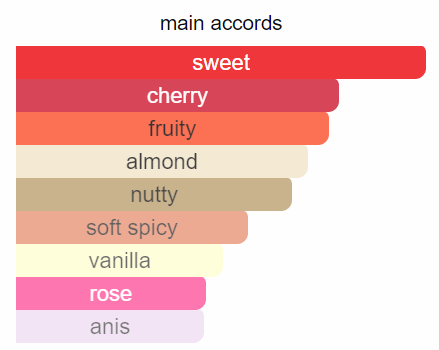


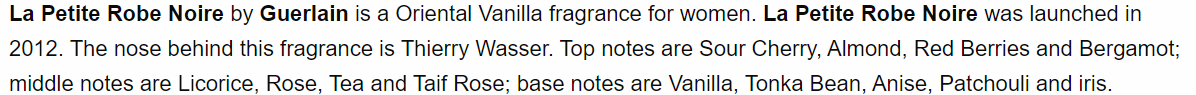

### https://www.fragrantica.com/perfume/Guerlain/La-Petite-Robe-Noire-5454.html

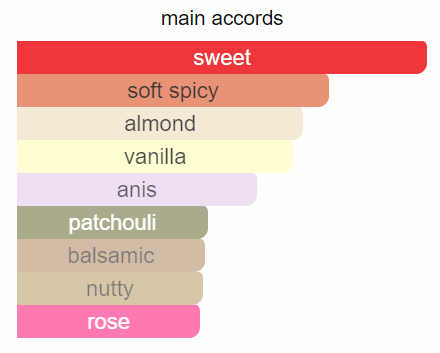

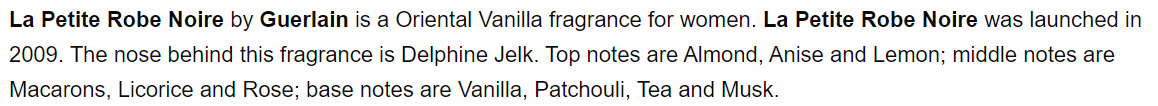

### Confirmed: These are different fragrances, with different formulations, launch dates and "noses"!

In [118]:
dup_avg_rating = {}
for fragrance in duplicates.index:
    dup_avg_rating[fragrance] = notes_ratings[['url', 'average_rating_']][notes_ratings['title'] == fragrance].values
# dup_avg_rating

### The fact the URLs have different numbers in their path (and different ratings) tell us these are *_NOT_* duplicates. We'll leave it as is!

### 2. Check for nulls

In [119]:
printmd(f'**Null count: {notes_ratings.isnull().sum().sum()}. That was easy!**')

**Null count: 0. That was easy!**

### 3. Extract top / middle / base notes from the `0`, `1`, `2`, `3` columns

In [120]:
fragrance_top_middle_base_notes_df = notes_ratings[['title', '0', '1', '2', '3']]

printmd(f'**Count of nulls: {fragrance_top_middle_base_notes_df.isnull().sum().sum()}**')

fragrance_top_middle_base_notes_df.head() 

**Count of nulls: 0**

,title,0,1,2,3
0,Aamal The Spirit of Dubai for women and men,Top0Turkish Rose,Top1Bulgarian Rose,Top2Bergamot,Top3Fruits
1,Aatifa Ajmal for women and men,Top0Nutmeg,Top1Rose,Top2Cumin,Middle0Amber
2,Aaliyah Xyrena for women and men,Top0Mandarin Orange,Top1Lavender,Top2Mint,Middle0Violet
3,AAA Al-Jazeera Perfumes for women and men,Top0Agarwood (Oud),Top1Lily,Top2Rose,Top3Pepper
4,c’i'aan source adage NYC for women and men,Top0Juniper,Top1Mint,Top2Apple,Top3Fir


#### Column `0`

In [121]:
# Check whether any rows do NOT start with 'Top0' in column `0`
ipd((fragrance_top_middle_base_notes_df['0'].apply(lambda x: x[:len('Top0')]) != 'Top0').astype(int).sum())

# Since they are all 'Top0', rename column
fragrance_top_middle_base_notes_df.rename(columns = {'0': 'top_0'}, inplace = True)

# Extract the note 
fragrance_top_middle_base_notes_df['top_0'] = (fragrance_top_middle_base_notes_df['top_0']
                                                    .apply(lambda x: x.split('Top0')[1]))
fragrance_top_middle_base_notes_df['top_0'].head()

0

0       Turkish Rose
1             Nutmeg
2    Mandarin Orange
3     Agarwood (Oud)
4            Juniper
Name: top_0, dtype: object

#### Column `1`

In [122]:
fragrance_top_middle_base_notes_df['1']

0          Top1Bulgarian Rose
1                    Top1Rose
2                Top1Lavender
3                    Top1Lily
4                    Top1Mint
                 ...         
41900          Top1Grapefruit
41901            Top1Bergamot
41902             Top1Vanille
41903    Top1Java vetiver oil
41904            Top1Lavender
Name: 1, Length: 41905, dtype: object

In [123]:
printmd(f"**Count of rows that do NOT start with 'Top1' in column `1`: {(fragrance_top_middle_base_notes_df['1'].apply(lambda x: x[:len('Top1')]) != 'Top1').astype(int).sum():,}**")

printmd("**'Top1' and 'Midd' (for 'Middle') appear in this column. Let's break them into two separate columns.**")
ipd(fragrance_top_middle_base_notes_df['1'].apply(lambda x: x[:len('Top1')]).value_counts())

# Extract the `Top1` note 
fragrance_top_middle_base_notes_df['top_1'] = (fragrance_top_middle_base_notes_df['1'][fragrance_top_middle_base_notes_df['1']
                                                     .apply(lambda x: x[:len('Top1')] == 'Top1')]
                                                     .apply(lambda x: x.split('Top1')[1]))

# Extract the `Middle` note 
fragrance_top_middle_base_notes_df['middle_0'] = (fragrance_top_middle_base_notes_df['1'][fragrance_top_middle_base_notes_df['1']
                                                     .apply(lambda x: x[:len('Middle0')] == 'Middle0')]
                                                     .apply(lambda x: x.split('Middle0')[1]))


# Check `Midd` count corresponds to null count in new column, `top_1`
fragrance_top_middle_base_notes_df['top_1'].isnull().sum()

# Preview
fragrance_top_middle_base_notes_df.iloc[35:41, :]

**Count of rows that do NOT start with 'Top1' in column `1`: 4,582**

**'Top1' and 'Midd' (for 'Middle') appear in this column. Let's break them into two separate columns.**

Top1    37323
Midd     4582
Name: 1, dtype: int64

,title,top_0,1,2,3,top_1,middle_0
35,DKNY Delicious Candy Apples Sweet Strawberry Donna Karan for women,Bergamot,Top1Big Strawberry,Top2African Orange flower,Middle0Jasmine,Big Strawberry,NaN
36,Daisy Hot Pink Marc Jacobs for women,Strawberry,Middle0Jasmine,Middle1Gardenia,Middle2Violet,NaN,Jasmine
37,Strawberry The Body Shop for women,Big Strawberry,Middle0nan,Base0nan,Middle0nan,NaN,nan
38,Gorgeous Victoria's Secret for women,Mandarin Orange,Top1Strawberry,Middle0Jasmine,Middle1Freesia,Strawberry,NaN
39,Figment Man Amouage for men,Lemon,Top1Geranium,Top2Pink Pepper,Middle0Sandalwood,Geranium,NaN
40,Femme Icon Avon for women,Raspberry,Top1Strawberry,Middle0iris,Middle1Rose,Strawberry,NaN


#### Missing values are filling in on the new columns, since there's a mix of note types in the original feature. We'll impute the missing values later, all at once.

In [124]:
# Make sure null count matches are correct: top_1's null count = middle_0 count, vice versa

fragrance_top_middle_base_notes_df[['top_1', 'middle_0']].isnull().sum()

top_1        4582
middle_0    37323
dtype: int64

#### Column `2`

In [125]:
printmd("**'Top2', 'Midd' (for 'Middle') and 'Base' appear in this column. Let's break them into two separate columns.**")
ipd(fragrance_top_middle_base_notes_df['2'].apply(lambda x: x[:4]). value_counts())

# Extract the `Top2` note 
fragrance_top_middle_base_notes_df['top_2'] = (fragrance_top_middle_base_notes_df['2'][fragrance_top_middle_base_notes_df['2']
                                                     .apply(lambda x: x[:len('Top2')] == 'Top2')]
                                                     .apply(lambda x: x.split('Top2')[1]))
# Which middle notes does this column contain?

col_2_middles = (fragrance_top_middle_base_notes_df['2'][fragrance_top_middle_base_notes_df['2']
                                                        .apply(lambda x: x[: len('Middle')]) == 'Middle'])

ipd(col_2_middles.apply(lambda x: x[: len('Middle_')]).value_counts())

# Extract the 'Middle0' and 'Middle1' notes

fragrance_top_middle_base_notes_df['middle_0_1'] = (fragrance_top_middle_base_notes_df['2'][fragrance_top_middle_base_notes_df['2']
                                                     .apply(lambda x: x[:len('Middle0')] == 'Middle0')]
                                                     .apply(lambda x: x.split('Middle0')[1]))

fragrance_top_middle_base_notes_df['middle_1'] = (fragrance_top_middle_base_notes_df['2'][fragrance_top_middle_base_notes_df['2']
                                                     .apply(lambda x: x[:len('Middle1')] == 'Middle1')]
                                                     .apply(lambda x: x.split('Middle1')[1]))

# Which base notes does this column contain?
col_2_bases = (fragrance_top_middle_base_notes_df['2'][fragrance_top_middle_base_notes_df['2']
                                                        .apply(lambda x: x[: len('Base')]) == 'Base'])
ipd(col_2_bases.apply(lambda x: x[: len('base_')]).value_counts())


# Extract the 'Base0' notes

fragrance_top_middle_base_notes_df['base_0'] = (fragrance_top_middle_base_notes_df['2'][fragrance_top_middle_base_notes_df['2']
                                                     .apply(lambda x: x[:len('Base0')] == 'Base0')]
                                                     .apply(lambda x: x.split('Base0')[1]))


# # Make sure null count matches are correct

# ipd(fragrance_top_middle_base_notes_df[['top_2', 'middle_0_1', 'middle_1', 'base_0']].isnull().sum())

# Preview
fragrance_top_middle_base_notes_df.iloc[89:95, :]

**'Top2', 'Midd' (for 'Middle') and 'Base' appear in this column. Let's break them into two separate columns.**

Top2    29377
Midd     9549
Base     2979
Name: 2, dtype: int64

Middle0    7946
Middle1    1603
Name: 2, dtype: int64

Base0    2979
Name: 2, dtype: int64

,title,top_0,1,2,3,top_1,middle_0,top_2,middle_0_1,middle_1,base_0
89,Secrets to Keep Avon for women,Apple,Top1Big Strawberry,Top2Jasmine,Top3White Musk,Big Strawberry,NaN,Jasmine,NaN,NaN,NaN
90,Frutas Vermelhas Natura for women,Strawberry,Top1Pear,Top2Plum,Top3Apple,Pear,NaN,Plum,NaN,NaN,NaN
91,5th Element Women Nike for women,Big Strawberry,Top1Raspberry,Top2Mandarin Orange,Middle0Jasmine,Raspberry,NaN,Mandarin Orange,NaN,NaN,NaN
92,C-Thru Blooming Sarantis for women,Pineapple,Top1Pear,Top2Big Strawberry,Middle0Orange Blossom,Pear,NaN,Big Strawberry,NaN,NaN,NaN
93,Charlotte Aux Fraises Adopt' by Reserve Naturelle for women,Lemon,Middle0Big Strawberry,Middle1Milk,Middle2Cupcake,NaN,Big Strawberry,NaN,NaN,Milk,NaN
94,Strawberry Creme Candie's for women,Big Strawberry,Middle0Floral Notes,Base0Vanilla,Base1Whipped cream,NaN,Floral Notes,NaN,NaN,NaN,Vanilla


#### Column `3`

In [126]:
printmd("**'Top3', 'Midd' (for 'Middle') and 'Base' appear in this column. Let's break them into two separate columns.**")
ipd(fragrance_top_middle_base_notes_df['3'].apply(lambda x: x[:4]). value_counts())

# Extract the `Top3` note 
fragrance_top_middle_base_notes_df['top_3'] = (fragrance_top_middle_base_notes_df['3'][fragrance_top_middle_base_notes_df['3']
                                                     .apply(lambda x: x[:len('Top3')] == 'Top3')]
                                                     .apply(lambda x: x.split('Top3')[1]))

# Which middle notes does this column contain?

col_3_middles = (fragrance_top_middle_base_notes_df['3'][fragrance_top_middle_base_notes_df['3']
                                                        .apply(lambda x: x[: len('Middle')]) == 'Middle'])

ipd(col_3_middles.apply(lambda x: x[: len('Middle_')]).value_counts())

# Extract the 'Middle0', 'Middle1' and 'Middle2' notes

fragrance_top_middle_base_notes_df['middle_0_2'] = (fragrance_top_middle_base_notes_df['3'][fragrance_top_middle_base_notes_df['3']
                                                     .apply(lambda x: x[:len('Middle0')] == 'Middle0')]
                                                     .apply(lambda x: x.split('Middle0')[1]))

fragrance_top_middle_base_notes_df['middle_1_1'] = (fragrance_top_middle_base_notes_df['3'][fragrance_top_middle_base_notes_df['3']
                                                     .apply(lambda x: x[:len('Middle1')] == 'Middle1')]
                                                     .apply(lambda x: x.split('Middle1')[1]))

fragrance_top_middle_base_notes_df['middle_2'] = (fragrance_top_middle_base_notes_df['3'][fragrance_top_middle_base_notes_df['3']
                                                     .apply(lambda x: x[:len('Middle2')] == 'Middle2')]
                                                     .apply(lambda x: x.split('Middle2')[1]))

# Which base notes does this column contain?
col_3_bases = (fragrance_top_middle_base_notes_df['3'][fragrance_top_middle_base_notes_df['3']
                                                        .apply(lambda x: x[: len('Base')]) == 'Base'])

ipd(col_3_bases.apply(lambda x: x[: len('base_')]).value_counts())


# Extract the 'Base0' and 'Base1' notes

fragrance_top_middle_base_notes_df['base_0_1'] = (fragrance_top_middle_base_notes_df['3'][fragrance_top_middle_base_notes_df['3']
                                                     .apply(lambda x: x[:len('Base0')] == 'Base0')]
                                                     .apply(lambda x: x.split('Base0')[1]))

fragrance_top_middle_base_notes_df['base_1'] = (fragrance_top_middle_base_notes_df['3'][fragrance_top_middle_base_notes_df['3']
                                                     .apply(lambda x: x[:len('Base1')] == 'Base1')]
                                                     .apply(lambda x: x.split('Base1')[1]))



# Preview
fragrance_top_middle_base_notes_df.iloc[89:95, :]

**'Top3', 'Midd' (for 'Middle') and 'Base' appear in this column. Let's break them into two separate columns.**

Midd    21300
Top3    17255
Base     3350
Name: 3, dtype: int64

Middle0    14691
Middle1     5883
Middle2      726
Name: 3, dtype: int64

Base0    2940
Base1     410
Name: 3, dtype: int64

,title,top_0,1,2,3,top_1,middle_0,top_2,middle_0_1,middle_1,base_0,top_3,middle_0_2,middle_1_1,middle_2,base_0_1,base_1
89,Secrets to Keep Avon for women,Apple,Top1Big Strawberry,Top2Jasmine,Top3White Musk,Big Strawberry,NaN,Jasmine,NaN,NaN,NaN,White Musk,NaN,NaN,NaN,NaN,NaN
90,Frutas Vermelhas Natura for women,Strawberry,Top1Pear,Top2Plum,Top3Apple,Pear,NaN,Plum,NaN,NaN,NaN,Apple,NaN,NaN,NaN,NaN,NaN
91,5th Element Women Nike for women,Big Strawberry,Top1Raspberry,Top2Mandarin Orange,Middle0Jasmine,Raspberry,NaN,Mandarin Orange,NaN,NaN,NaN,NaN,Jasmine,NaN,NaN,NaN,NaN
92,C-Thru Blooming Sarantis for women,Pineapple,Top1Pear,Top2Big Strawberry,Middle0Orange Blossom,Pear,NaN,Big Strawberry,NaN,NaN,NaN,NaN,Orange Blossom,NaN,NaN,NaN,NaN
93,Charlotte Aux Fraises Adopt' by Reserve Naturelle for women,Lemon,Middle0Big Strawberry,Middle1Milk,Middle2Cupcake,NaN,Big Strawberry,NaN,NaN,Milk,NaN,NaN,NaN,NaN,Cupcake,NaN,NaN
94,Strawberry Creme Candie's for women,Big Strawberry,Middle0Floral Notes,Base0Vanilla,Base1Whipped cream,NaN,Floral Notes,NaN,NaN,NaN,Vanilla,NaN,NaN,NaN,NaN,NaN,Whipped cream


#### We'll combine the notes later once `top_middle_base_notes` are binarized

In [127]:
# Export for safekeeping

fragrance_top_middle_base_notes_df.to_csv('../data/data_subsets/fragrance_top_middle_base_notes_df.csv')

In [128]:
# Remind ourselves of the sets of notes names 

printmd('**top_middle_base_cols:**')
ipd(np.array(top_middle_base_cols))
        
printmd('**notes_names:**')
np.array(notes_names)

**top_middle_base_cols:**

array(['top_0', 'top_1', 'top_2', 'top_3', 'middle_0', 'middle_0_1',
       'middle_1', 'middle_0_2', 'middle_1_1', 'middle_2', 'base_0',
       'base_0_1', 'base_1'], dtype='<U10')

**notes_names:**

array(['alcohol', 'aldehydic', 'almond', 'amber', 'animalic', 'anis',
       'aquatic', 'aromatic', 'asphault', 'bacon', 'balsamic', 'bbq',
       'beeswax', 'bitter', 'cacao', 'camphor', 'caramel', 'caramela',
       'cherry', 'cinnamon', 'citrus', 'clay', 'coca-cola', 'coconut',
       'coffee', 'cognac', 'conifer', 'earthy', 'floral', 'foresty',
       'fresh', 'fresh spicy', 'fruity', 'gourmand', 'green', 'herbal',
       'honey', 'industrial glue', 'lactonic', 'leather', 'marine',
       'martini', 'metallic', 'milky', 'mossy', 'musky', 'narcotic',
       'nutty', 'oud', 'ozonic', 'patchouli', 'plastic', 'powdery',
       'rose', 'rum', 'salty', 'sand', 'savory', 'smoky', 'soapy',
       'soft spicy', 'sour', 'sweet', 'tennis ball', 'terpenic',
       'tobacco', 'tonka (coumarin)', 'tropical', 'tuberose', 'unknown',
       'vanilla', 'vinyl', 'violet', 'vodka', 'warm spicy', 'watery',
       'wet plaster', 'whiskey', 'white floral', 'white wine', 'wine',
       'woody', 'yellow fl

- - - 

# EDA

1. [x] `longevity` and `sillage`
- [x] `clslove`, `clslike`, `clsdislike`
- [x]  `average_rating_`

### 1. `longevity` and `sillage`

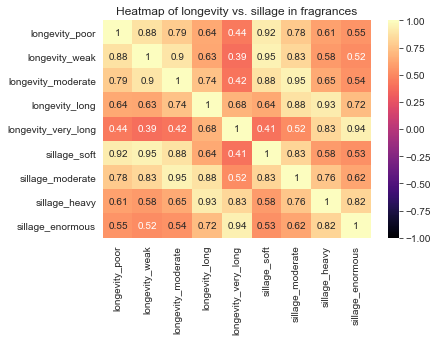

In [129]:
longevity_cols = [col for col in notes_ratings.columns if col.startswith('longevity')]
sillage_cols = [col for col in notes_ratings.columns if col.startswith('sillage')]
longevity_sillage_cols = [col for col in notes_ratings.columns if col.startswith('longevity') or col.startswith('sillage')]


longevity_sillage_corr = notes_ratings[longevity_sillage_cols].corr()
mask = np.zeros_like(longevity_sillage_corr)
mask[np.triu_indices_from(mask)] = True

# Check out heatmap of correlations
sns.heatmap(notes_ratings[longevity_sillage_cols].corr(), 
           vmin = -1, 
           vmax = 1,
           cmap = 'magma',
           mask = False, 
           annot = True)

plt.title('Heatmap of longevity vs. sillage in fragrances');

# This code is taken with minor modifications from https://seaborn.pydata.org/generated/seaborn.heatmap.html and GA instructors

In [130]:
# Let's look more closely at `longevity` and `sillage` features

longevity_sillage_df = pd.concat([notes_ratings['title'], notes_ratings[longevity_sillage_cols]], axis = 1)
longevity_sillage_df = longevity_sillage_df.drop_duplicates()

# Let's look at one feature as an example: `longevity_very_long`

printmd('**Fragrances with top 5 long `longevity` ratings:**')
ipd(longevity_sillage_df[['title', 'longevity_very_long']].sort_values(by = 'longevity_very_long',
                                                                  ascending = False).head(5))

printmd('**Summary stats for long `longevity` ratings:**')
ipd(longevity_sillage_df[['title', 'longevity_very_long']].describe())

**Fragrances with top 5 long `longevity` ratings:**

,title,longevity_very_long
8463,Angel Mugler for women,1258
7133,Alien Mugler for women,1240
31280,A*Men Mugler for men,1212
12695,Black Orchid Tom Ford for women,1161
26347,Tobacco Vanille Tom Ford for women and men,968


**Summary stats for long `longevity` ratings:**

,longevity_very_long
count,41905.000000
mean,4.318983
std,24.921431
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,1258.000000


**Takeaway questions:**

1. What is the scale of the `longevity_very_long` feature?


2. Is it the sum of user ratings for each review? If so, how to extract the review count from the source (if possible), since the review-level detail isn't available?

**Further digging is needed, but outside the project scope**

**An extension of this project would look at this further.**

In [131]:
# Drop `longevity` and `sillage` columns to declutter the dataset
notes_ratings.drop(columns = longevity_sillage_cols, inplace = True)

_ _ _

### 2. `clslove`, `clslike`, `clsdislike`

In [132]:
love_like_dislike_df = notes_ratings[['title', 'clslove', 'clslike', 'clsdislike']].drop_duplicates()
ipd(love_like_dislike_df.describe())

print(f'Null count: {love_like_dislike_df.isnull().sum().sum()}')

love_like_dislike_df

,clslove,clslike,clsdislike
count,41905.000000,41905.000000,41905.000000
mean,65.719938,70.617015,29.888939
std,36.070871,35.461496,29.548864
min,1.000000,1.000000,1.000000
25%,38.000000,50.000000,1.000000
50%,75.000000,90.000000,24.000000
75%,100.000000,100.000000,44.000000
max,100.000000,100.000000,100.000000


Null count: 0


,title,clslove,clslike,clsdislike
0,Aamal The Spirit of Dubai for women and men,100,1,1
1,Aatifa Ajmal for women and men,100,80,20
2,Aaliyah Xyrena for women and men,100,25,25
3,AAA Al-Jazeera Perfumes for women and men,100,33,1
4,c’i'aan source adage NYC for women and men,66,100,33
...,...,...,...,...
41900,Tesey Les Contes for men,1,100,1
41901,Quasar Alchimista for women and men,40,100,20
41902,Onyx & Peridot Sage Machado for women,50,100,50
41903,Sine Tempore Arte Profumi for women and men,1,100,1


**Takeaway questions:** How does a 100 score on `clslove`, a 65 score on `clslike` and a 33 score on `clsdislike` stack up relative to each other and relative to the whole set of reviews on which these scores were based?

**Let's drop `clslove`, `clslike`, `clsdislike` since we can't readily make sense of the proportions.**

In [133]:
# Drop `clslove`, `clslike`, `clsdislike` to declutter the dataset
notes_ratings.drop(columns = ['clslove', 'clslike', 'clsdislike'], inplace = True)

**I see the writing on the wall re: hard-to-work-with `cls` columns (unknown scale, unknown collection practices, etc.). Let's just drop them.**

**It would be nice to preserve as much original data as possible, but we will take another tack here (sentiment analysis, clustering, etc.) here. More to come!**

In [134]:
# Drop the rest of the `cls` columns to declutter the dataset

notes_ratings.drop(columns = [col for col in notes_ratings.columns if col.startswith('cls')], inplace = True)

# Drop the `I _ it` columns to declutter the dataset

notes_ratings.drop(columns = ['Ihaveit', 'Ihadit', 'Iwantit'], inplace = True)

# While we're at it, what's going on with the `Champagne` column?
ipd(notes_ratings['Champagne'].sum())

# This column has no info. Let's drop it
notes_ratings.drop(columns = 'Champagne', inplace = True)

3

In [135]:
printmd('**Updated column names**')
cols_notes_ratings = np.array(notes_ratings.columns)
cols_notes_ratings

**Updated column names**

array(['url', 'title', 'perfume_id', 'people', 'average_rating_', 'date',
       '0', '1', '2', '3', 'Pictures', 'Videos', 'alcohol', 'aldehydic',
       'almond', 'amber', 'animalic', 'anis', 'aquatic', 'aromatic',
       'asphault', 'bacon', 'balsamic', 'bbq', 'beeswax', 'bitter',
       'cacao', 'camphor', 'caramel', 'caramela', 'cherry', 'cinnamon',
       'citrus', 'clay', 'coca-cola', 'coconut', 'coffee', 'cognac',
       'conifer', 'earthy', 'floral', 'foresty', 'fresh', 'fresh spicy',
       'fruity', 'gourmand', 'green', 'herbal', 'honey',
       'industrial glue', 'lactonic', 'leather', 'marine', 'martini',
       'metallic', 'milky', 'mossy', 'musky', 'narcotic', 'nutty', 'oud',
       'ozonic', 'patchouli', 'plastic', 'powdery', 'rose', 'rum',
       'salty', 'sand', 'savory', 'smoky', 'soapy', 'soft spicy', 'sour',
       'sweet', 'tennis ball', 'terpenic', 'tobacco', 'tonka (coumarin)',
       'tropical', 'tuberose', 'unknown', 'vanilla', 'vinyl', 'violet',
       'vodka'

_ _ _

### 3. `average_rating_`

In [136]:
printmd('**We will treat `ratings_bins` as an ordinal categorical variable, since the values are discrete.**')

ratings_bins = notes_ratings['average_rating_'].apply(lambda x: str(x)[0])

notes_ratings['ratings_bins'] = ratings_bins

printmd('**Counts of `ratings_bins`:**')
ipd(notes_ratings['ratings_bins'].value_counts(normalize = False)
                             .sort_values(ascending = False))

printmd('**Proportions of `ratings_bins`:**')
ipd(notes_ratings['ratings_bins'].value_counts(normalize = True)
                             .sort_values(ascending = False))

printmd("**The classes of `ratings_bins` are unbalanced.**")

**We will treat `ratings_bins` as an ordinal categorical variable, since the values are discrete.**

**Counts of `ratings_bins`:**

4    19599
3    16704
5     2819
2     1903
1      880
Name: ratings_bins, dtype: int64

**Proportions of `ratings_bins`:**

4    0.467701
3    0.398616
5    0.067271
2    0.045412
1    0.021000
Name: ratings_bins, dtype: float64

**The classes of `ratings_bins` are unbalanced.**

In [137]:
printmd("**Let's check out the target variable, `average_rating`**")
ipd(notes_ratings['average_rating_'].describe())

**Let's check out the target variable, `average_rating`**

count    41905.000000
mean         3.901397
std          0.695807
min          1.000000
25%          3.640000
50%          4.000000
75%          4.300000
max          5.000000
Name: average_rating_, dtype: float64

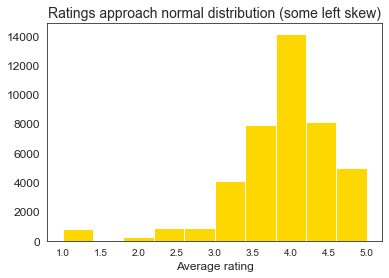

In [138]:
notes_ratings['average_rating_'].hist(color = 'gold', 
                                      grid = False)
plt.xlabel('Average rating', size = 12)
plt.yticks(size = 12)
plt.title('Ratings approach normal distribution (some left skew)', size = 14)
plt.savefig('../figures/distn_average_rating.png')

## Now that we've done EDA on the low-hanging fruit, let's create a new dataframe to work with, doing the following for further EDA:

#### Merge the original dataframe (`notes_ratings`) with:

#### Additional extracted notes (`fragrance_top_middle_base_notes_df`)

In [139]:
fragrance_all_notes = pd.merge(notes_ratings.drop(columns = ['0', '1', '2', '3']),
                                 fragrance_top_middle_base_notes_df.drop(columns = ['1', '2', '3']))
                  
# Drop these columns since they won't be relevant to the project

fragrance_all_notes.drop(columns = ['perfume_id', 'people', 'date', 'Pictures', 'Videos'], inplace = True)

fragrance_all_notes.head(1)

,url,title,average_rating_,alcohol,aldehydic,almond,amber,animalic,anis,aquatic,aromatic,asphault,bacon,balsamic,bbq,beeswax,bitter,cacao,camphor,caramel,caramela,cherry,cinnamon,citrus,clay,coca-cola,coconut,coffee,cognac,conifer,earthy,floral,foresty,fresh,fresh spicy,fruity,gourmand,green,herbal,honey,industrial glue,lactonic,...,salty,sand,savory,smoky,soapy,soft spicy,sour,sweet,tennis ball,terpenic,tobacco,tonka (coumarin),tropical,tuberose,unknown,vanilla,vinyl,violet,vodka,warm spicy,watery,wet plaster,whiskey,white floral,white wine,wine,woody,yellow floral,ratings_bins,top_0,top_1,middle_0,top_2,middle_0_1,middle_1,base_0,top_3,middle_0_2,middle_1_1,middle_2,base_0_1,base_1
0,https://www.fragrantica.com/perfume/The-Spirit-of-Dubai/Aamal-44152.html,Aamal The Spirit of Dubai for women and men,5.0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5,Turkish Rose,Bulgarian Rose,NaN,Bergamot,NaN,NaN,NaN,Fruits,NaN,NaN,NaN,NaN,NaN


#### Impute 'None' to nulls

In [140]:
# Nulls that came from blanks
fragrance_all_notes[top_middle_base_cols] = fragrance_all_notes[top_middle_base_cols].fillna('None')

# Nulls that came from 'nan' in the original dataset columns `0`, `1`, `2` and `3`
fragrance_all_notes[top_middle_base_cols] = (fragrance_all_notes[top_middle_base_cols]
                                                               .apply(lambda x: x.replace('nan', 'None')))

fragrance_all_notes.head(1)

,url,title,average_rating_,alcohol,aldehydic,almond,amber,animalic,anis,aquatic,aromatic,asphault,bacon,balsamic,bbq,beeswax,bitter,cacao,camphor,caramel,caramela,cherry,cinnamon,citrus,clay,coca-cola,coconut,coffee,cognac,conifer,earthy,floral,foresty,fresh,fresh spicy,fruity,gourmand,green,herbal,honey,industrial glue,lactonic,...,salty,sand,savory,smoky,soapy,soft spicy,sour,sweet,tennis ball,terpenic,tobacco,tonka (coumarin),tropical,tuberose,unknown,vanilla,vinyl,violet,vodka,warm spicy,watery,wet plaster,whiskey,white floral,white wine,wine,woody,yellow floral,ratings_bins,top_0,top_1,middle_0,top_2,middle_0_1,middle_1,base_0,top_3,middle_0_2,middle_1_1,middle_2,base_0_1,base_1
0,https://www.fragrantica.com/perfume/The-Spirit-of-Dubai/Aamal-44152.html,Aamal The Spirit of Dubai for women and men,5.0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5,Turkish Rose,Bulgarian Rose,None,Bergamot,None,None,None,Fruits,None,None,None,None,None


### EDA on top 5 most frequent top notes

In [141]:
# Create a dataframe with the top 5 value counts of top notes

top_5_top_notes_value_counts_dict = {}

for col in fragrance_all_notes[top_cols].columns:
    top_5_top_notes_value_counts_dict[col] = fragrance_all_notes[col].value_counts()[:4]

top_5_top_notes_value_counts_df =  (pd.DataFrame(top_5_top_notes_value_counts_dict)
                                      .fillna(0)                          # Fill nulls with 0
                                      .drop(index = 'None'))              # Drop 'None' note - uninformative!
         
top_5_top_notes_value_counts_df

,top_0,top_1,top_2,top_3
Bergamot,5762.0,2692.0,1454.0,770.0
Citruses,1294.0,0.0,0.0,0.0
Lemon,1303.0,1281.0,742.0,0.0
Mandarin Orange,1747.0,1915.0,1097.0,405.0
Musk,0.0,0.0,0.0,406.0


In [142]:
'''
Sum across top_5_notes_value_counts_df top notes (since they currently have meaningless prefixes,
like `top_0`, `top_1`, etc.

The row-wise totals we're going for:
(top_5_notes_value_counts_df.loc['Bergamot', 'top_0'] + top_5_notes_value_counts_df.loc['Bergamot', 'top_1'] +
top_5_notes_value_counts_df.loc['Bergamot', 'top_2'] + top_5_notes_value_counts_df.loc['Bergamot', 'top_3'])
'''
top_counts = []

for i in top_5_top_notes_value_counts_df.index:
    for col in top_cols:
        top_counts.append(top_5_top_notes_value_counts_df.loc[i, col])

top_counts_total = []    

for j in range(4, len(top_counts) + 4, 4):
    top_counts_total.append(sum(top_counts[j - 4: j]))

# Does the values list length match the original row count times column count for the class?
len(top_counts) == (len(top_5_top_notes_value_counts_df.index) * 4)

top_5_top_notes_value_counts_df['top_total'] = top_counts_total

# Does the grand total of the 4 top_cols columns match the grand total of the `top_total` column?

top_5_top_notes_value_counts_df[top_cols].sum().sum() == top_5_top_notes_value_counts_df['top_total'].sum().sum()

top_5_top_notes_value_counts_df

,top_0,top_1,top_2,top_3,top_total
Bergamot,5762.0,2692.0,1454.0,770.0,10678.0
Citruses,1294.0,0.0,0.0,0.0,1294.0
Lemon,1303.0,1281.0,742.0,0.0,3326.0
Mandarin Orange,1747.0,1915.0,1097.0,405.0,5164.0
Musk,0.0,0.0,0.0,406.0,406.0


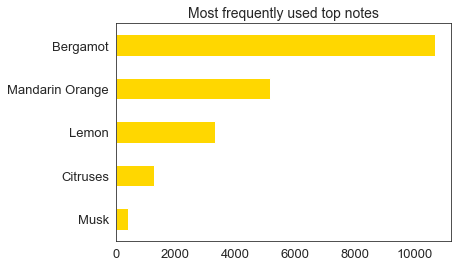

In [143]:
# Plot most frequently used top notes

(top_5_top_notes_value_counts_df['top_total'].sort_values(ascending = False)[:5][::-1]
                                        .plot.barh(color = 'gold'))
plt.title('Most frequently used top notes', size = 14)
plt.xticks(size = 13)
plt.yticks(size = 13);

In [144]:
printmd('**Check that sum of top notes matches dataset row count**')

for i in top_cols:
    
    print(fragrance_all_notes[i].value_counts().sum() == len(fragrance_all_notes))

**Check that sum of top notes matches dataset row count**

True
True
True
True


### EDA on top 5 most frequent middle notes

In [145]:
# Create a dataframe with the top 5 value counts of middle notes

top_5_mid_notes_value_counts_dict = {}

for col in fragrance_all_notes[middle_cols].columns:
    top_5_mid_notes_value_counts_dict[col] = fragrance_all_notes[col].value_counts()[:5]

top_5_mid_notes_value_counts_df =  (pd.DataFrame(top_5_mid_notes_value_counts_dict)
                                      .fillna(0)                          # Fill nulls with 0
                                      .drop(index = 'None'))              # Drop 'None' note - uninformative!
         
top_5_mid_notes_value_counts_df

,middle_0,middle_0_1,middle_1,middle_0_2,middle_1_1,middle_2
Floral Notes,102.0,0.0,0.0,0.0,0.0,0.0
Jasmine,258.0,802.0,159.0,1434.0,574.0,52.0
Lavender,0.0,188.0,0.0,339.0,0.0,0.0
Lily-of-the-Valley,0.0,0.0,0.0,0.0,148.0,0.0
Patchouli,0.0,0.0,43.0,0.0,0.0,0.0
Rose,237.0,541.0,142.0,807.0,421.0,60.0
Tuberose,0.0,0.0,0.0,0.0,0.0,25.0
Violet,0.0,0.0,0.0,0.0,160.0,27.0
Ylang-Ylang,0.0,0.0,42.0,0.0,0.0,0.0
iris,67.0,209.0,0.0,286.0,0.0,0.0


In [146]:
# For the top 5 most frequently used notes, get counts of the middle notes class

middle_counts = []

for i in top_5_mid_notes_value_counts_df.index:
    for col in middle_cols:
        middle_counts.append(top_5_mid_notes_value_counts_df.loc[i, col])

middle_counts_total = []    

for j in range(6, len(middle_counts) + 6, 6):
    middle_counts_total.append(sum(middle_counts[j - 6: j]))

# Does the values list length match the original row count times column count for the class?
print(len(middle_counts) == (len(top_5_mid_notes_value_counts_df.index) * 6))

top_5_mid_notes_value_counts_df['middle_total'] = middle_counts_total

# Does the grand total of the middle_cols columns match the grand total of the `middle_total` column?

top_5_mid_notes_value_counts_df[middle_cols].sum().sum() == top_5_mid_notes_value_counts_df['middle_total'].sum().sum()

# Cutoff is 5 highest counts
top_5_mid_notes_value_counts_df = (top_5_mid_notes_value_counts_df.sort_values(by = 'middle_total',
                                                                              ascending = False)[:5])
top_5_mid_notes_value_counts_df

True


,middle_0,middle_0_1,middle_1,middle_0_2,middle_1_1,middle_2,middle_total
Jasmine,258.0,802.0,159.0,1434.0,574.0,52.0,3279.0
Rose,237.0,541.0,142.0,807.0,421.0,60.0,2208.0
iris,67.0,209.0,0.0,286.0,0.0,0.0,562.0
Lavender,0.0,188.0,0.0,339.0,0.0,0.0,527.0
Violet,0.0,0.0,0.0,0.0,160.0,27.0,187.0


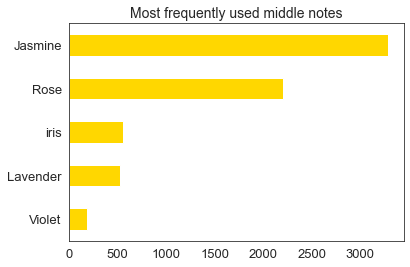

In [147]:
# Plot most frequently used middle notes

top_5_mid_notes_value_counts_df['middle_total'][::-1].plot.barh(color = 'gold')
plt.title('Most frequently used middle notes', size = 14)
plt.xticks(size = 13)
plt.yticks(size = 13);

### EDA on top 5 most frequent base notes

In [148]:
# Create a dataframe with the top 5 value counts of base notes

top_5_base_notes_value_counts_dict = {}

for col in fragrance_all_notes[base_cols].columns:
    top_5_base_notes_value_counts_dict[col] = fragrance_all_notes[col].value_counts()[:5]

top_5_base_notes_value_counts_df =  (pd.DataFrame(top_5_base_notes_value_counts_dict)
                                      .fillna(0)                          # Fill nulls with 0
                                      .drop(index = 'None'))              # Drop 'None' note - uninformative!
         
top_5_base_notes_value_counts_df

,base_0,base_0_1,base_1
Amber,89.0,130.0,44.0
Musk,134.0,222.0,50.0
Patchouli,76.0,127.0,0.0
Sandalwood,90.0,127.0,0.0
Vanilla,0.0,0.0,42.0
Woody Notes,0.0,0.0,25.0


In [149]:
# For the top 5 most frequently used notes, get counts of the base notes class

base_counts = []

for i in top_5_base_notes_value_counts_df.index:
    for col in base_cols:
        base_counts.append(top_5_base_notes_value_counts_df.loc[i, col])

base_counts_total = []    

for j in range(3, len(base_counts) + 3, 3):
    base_counts_total.append(sum(base_counts[j - 3: j]))

# Does the values list length match the original row count times column count for the class?
print(len(base_counts) == (len(top_5_base_notes_value_counts_df.index) * 3))

top_5_base_notes_value_counts_df['base_total'] = base_counts_total

# Does the grand total of the base_cols columns match the grand total of the `base_total` column?

top_5_base_notes_value_counts_df[base_cols].sum().sum() == top_5_base_notes_value_counts_df['base_total'].sum().sum()

# Cutoff is 5 highest counts
top_5_base_notes_value_counts_df = (top_5_base_notes_value_counts_df.sort_values(by = 'base_total',
                                                                              ascending = False)[:5])
top_5_base_notes_value_counts_df

True


,base_0,base_0_1,base_1,base_total
Musk,134.0,222.0,50.0,406.0
Amber,89.0,130.0,44.0,263.0
Sandalwood,90.0,127.0,0.0,217.0
Patchouli,76.0,127.0,0.0,203.0
Vanilla,0.0,0.0,42.0,42.0


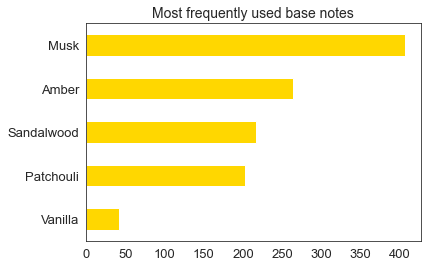

In [150]:
# Plot most frequently used base notes

top_5_base_notes_value_counts_df['base_total'][::-1].plot.barh(color = 'gold')
plt.title('Most frequently used base notes', size = 14)
plt.xticks(size = 13)
plt.yticks(size = 13);

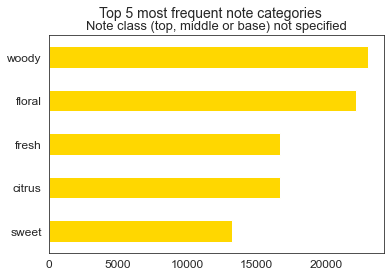

In [151]:
# Plot top 5 most frequent fragrance note categories

notes_count_top_5 = (pd.DataFrame(fragrance_all_notes[notes_names].sum()
                                                          .sort_values(ascending = False)[:5][::-1],
                                                          columns = ['Count']))
notes_count_top_5.plot(kind = 'barh',
                 color = 'gold', 
                 legend = False)

plt.suptitle('Top 5 most frequent note categories', size = 14)
plt.title('Note class (top, middle or base) not specified', size = 13)

plt.xticks(size = 12)

plt.yticks(size = 12)

plt.savefig('../figures/most_freq_note_categories.png')

### As expected, the scent profiles across notes classes are distinct.

#### `top_notes` are fruit-based, light, peppy scents.

#### `middle_notes` are floral-based complex scents.

#### `base_notes` are a mix of heavy scents that bring depth and warmth to a fragrance.

In [152]:
# Summarize top 5 notes across classes in preparation for a plot

top_5_all_notes_value_counts_df = pd.DataFrame(pd.concat([top_5_top_notes_value_counts_df['top_total'],
                                   top_5_mid_notes_value_counts_df['middle_total']]))

top_5_all_notes_value_counts_df = (pd.concat([top_5_all_notes_value_counts_df, top_5_base_notes_value_counts_df['base_total']],
                                            axis = 0).rename(columns = {0: 'Count'}))

top_5_all_notes_value_counts_df['Notes class'] = 'top'
for i in range(5, 10):
    top_5_all_notes_value_counts_df['Notes class'].iloc[i] = 'middle'
for i in range(10, 15):
    top_5_all_notes_value_counts_df['Notes class'].iloc[i] = 'base'    


top_5_all_notes_value_counts_df

,Count,Notes class
Bergamot,10678.0,top
Citruses,1294.0,top
Lemon,3326.0,top
Mandarin Orange,5164.0,top
Musk,406.0,top
Jasmine,3279.0,middle
Rose,2208.0,middle
iris,562.0,middle
Lavender,527.0,middle
Violet,187.0,middle


### Scale the data for a better comparison

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 <a list of 7 Text major ticklabel objects>)

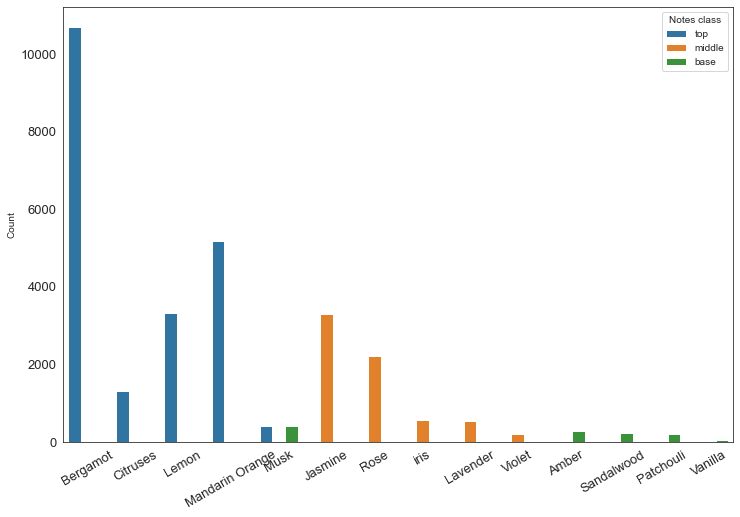

In [153]:
fig, ax = plt.subplots(figsize = (12, 8))

sns.barplot(data = top_5_all_notes_value_counts_df, 
            x = top_5_all_notes_value_counts_df.index, 
            y = 'Count', 
            hue = 'Notes class')

plt.xticks(rotation = 30, size = 13)

plt.yticks(size = 13)

## Tying it all together, let's get a final read on the imbalance among notes classes across top 5 most frequent AND overall.

In [167]:
top_cols = [col for col in fragrance_df_top_mid_base.columns if ('top' in col) & ('none' not in col)]
middle_cols = [col for col in fragrance_df_top_mid_base.columns if ('middle' in col)  & ('none' not in col)]
base_cols = [col for col in fragrance_df_top_mid_base.columns if ('base' in col)  & ('none' not in col)]

printmd(f'**Count of `top_cols`: {len(top_cols):,}**')
printmd(f'**Count of `middle_cols`: {len(middle_cols):,}**')
printmd(f'**Count of `base_cols`: {len(base_cols):,}**')

**Count of `top_cols`: 3,626**

**Count of `middle_cols`: 2,522**

**Count of `base_cols`: 501**

In [168]:
# Create a summary dataframe for notes class counts overall and in top 5 most frequent per class

# Collect sum totals for notes classes overall

counts_overall = [fragrance_df_top_mid_base[top_cols].sum().sum(), 
                  fragrance_df_top_mid_base[middle_cols].sum().sum(), 
                  fragrance_df_top_mid_base[base_cols].sum().sum()]

# Collect sum totals for notes classes just for the 5 most frequent scents per class

counts_top_5 = [top_5_top_notes_value_counts_df['top_total'].sum(),
                top_5_mid_notes_value_counts_df['middle_total'].sum(),
                top_5_base_notes_value_counts_df['base_total'].sum()]

counts_overall_v_top = {}
i, j, k = ['top', 'middle', 'base']

# Pair tuples of overall counts and top 5 counts

counts_zip = list(zip(counts_overall, counts_top_5))

# Add corresponding notes classes to counts

counts_overall_v_top[i] = counts_zip[0]
counts_overall_v_top[j] = counts_zip[1]
counts_overall_v_top[k] = counts_zip[2]                

# Set up dataframe of comparative counts between top 5 and overall notes counts

counts_overall_v_top_df = (pd.DataFrame(counts_overall_v_top, 
                             index = ['Overall', 'Top 5 most frequent']).T.stack())

counts_overall_v_top_df = counts_overall_v_top_df.reset_index()
counts_overall_v_top_df.columns = ['Notes class', 'Subset', 'Count']

# ref: https://stackoverflow.com/questions/49505080/python-pandas-how-to-set-the-name-of-multiindex

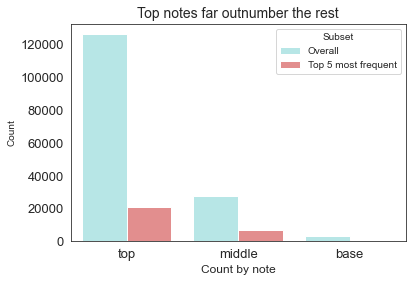

In [164]:
# Create a barchart to compare subsets so we can get an idea of the scale of imbalance

colors = {'Overall': 'paleturquoise', 'Top 5 most frequent': 'lightcoral'}

sns.barplot(data = counts_overall_v_top_df,
             x = 'Notes class',
             y = 'Count',
             hue = 'Subset', 
            palette = colors)

plt.title('Top notes far outnumber the rest', size = 14)

plt.xlabel('Count by note', size = 12)

plt.xticks(size = 13)

plt.yticks(size = 13)

plt.savefig('../figures/notes_counts_overall_and_most_freq.png')

### Among the top five most frequent notes per class, the number of top notes has the most by far.

#### This probably means there are many more top notes recorded for each fragrance, compared to the other classes.

#### Otherwise, but less likely, there's a far more even distribution of middle and base notes across unique notes than top-heavy top notes.

### Let's go through the steps to dummify the classes. Then we'll be in a position to look at the class distributions further, when the time comes.

## Create dummies of top, middle and base notes

In [155]:
# Remind ourselves what the `top_cols` look like in the main dataframe
ipd(fragrance_all_notes[top_cols].head(1))

# Set up top notes dummies
top_notes_dummies = pd.get_dummies(fragrance_all_notes[top_cols])
print('\n')
printmd('**Dummified top notes:**')
ipd(top_notes_dummies.head(1))

# Set up dummies
top_middle_base_cols_dummies = pd.get_dummies(fragrance_all_notes[top_middle_base_cols])
print('\n')
printmd('**Dummified top_middle_base notes:**')
ipd(top_middle_base_cols_dummies.head(1))

,top_0,top_1,top_2,top_3
0,Turkish Rose,Bulgarian Rose,Bergamot,Fruits


**Dummified top notes:**

,top_0_Absinthe,top_0_Acai berry,top_0_Acerola,top_0_Acácia,top_0_African Freesia Petals,top_0_African Geranium,top_0_African Ginger,top_0_African Orange flower,top_0_African Violet,top_0_Agarwood (Oud),top_0_Agave,top_0_Akigalawood,top_0_Aldehydes,top_0_Algae,top_0_Allspice,top_0_Almond,top_0_Almond Blossom,top_0_Almond Milk,top_0_Aloe Vera,top_0_Amalfi Lemon,top_0_Amaranth,top_0_Amaretto,top_0_Amazon Lily,top_0_Amber,top_0_Amber Xtreme,top_0_Amber from Tunis,top_0_Ambergris,top_0_Amberwood,top_0_Ambrette (Musk Mallow),top_0_Ambrettolide,top_0_Ambroxan,top_0_American Apple,top_0_Amyris,top_0_Angelica,top_0_Angels Trumpet,top_0_Animal notes,top_0_Anise,top_0_Apple,top_0_Apple Blossom,top_0_Apple Tree,top_0_Apple juice,top_0_Apricot,...,top_3_Wild Strawberry Leaf,top_3_Wild berries,top_3_Wildflowers,top_3_Wisteria,top_3_Wolfberry,top_3_Wood resin,top_3_Woodsy Notes,top_3_Woody Notes,top_3_Wool,top_3_Wormwood,top_3_Yellow Freesia,top_3_Yellow Mandarin,top_3_Yellow Narcissus,top_3_Yellow Plum,top_3_Ylang-Ylang,top_3_Yuzu,top_3_black fig,top_3_boxwood,top_3_cannabis,top_3_cream soda,top_3_dark woodsy notes,top_3_elemi,top_3_gunpowder,top_3_hassaku,top_3_heather,top_3_iris,top_3_jackfruit,top_3_juniper berry,top_3_litsea cubeba,top_3_mulberry,top_3_oak moss,top_3_plum,top_3_resins,top_3_sake,top_3_spun sugar,top_3_sycamore,top_3_tincture of rose,top_3_vanilla bean,top_3_vetyver,top_3_violet leaves,top_3_watercress,top_3_white honey
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Dummified top_middle_base notes:**

,top_0_Absinthe,top_0_Acai berry,top_0_Acerola,top_0_Acácia,top_0_African Freesia Petals,top_0_African Geranium,top_0_African Ginger,top_0_African Orange flower,top_0_African Violet,top_0_Agarwood (Oud),top_0_Agave,top_0_Akigalawood,top_0_Aldehydes,top_0_Algae,top_0_Allspice,top_0_Almond,top_0_Almond Blossom,top_0_Almond Milk,top_0_Aloe Vera,top_0_Amalfi Lemon,top_0_Amaranth,top_0_Amaretto,top_0_Amazon Lily,top_0_Amber,top_0_Amber Xtreme,top_0_Amber from Tunis,top_0_Ambergris,top_0_Amberwood,top_0_Ambrette (Musk Mallow),top_0_Ambrettolide,top_0_Ambroxan,top_0_American Apple,top_0_Amyris,top_0_Angelica,top_0_Angels Trumpet,top_0_Animal notes,top_0_Anise,top_0_Apple,top_0_Apple Blossom,top_0_Apple Tree,top_0_Apple juice,top_0_Apricot,...,base_1_Oriental notes,base_1_Patchouli,base_1_Pine,base_1_Powdery Notes,base_1_Praline,base_1_Raspberry,base_1_Red Cedar,base_1_Resin,base_1_Rose,base_1_Saffron,base_1_Sandalwood,base_1_Siam Benzoin,base_1_Spices,base_1_Spicy Notes,base_1_Styrax,base_1_Sugar,base_1_Sumac,base_1_Sweet Notes,base_1_Tahitian Vanilla,base_1_Tobacco,base_1_Toffee,base_1_Tonka Bean,base_1_Tuberose,base_1_Turkish Rose,base_1_Vanila,base_1_Vanilla,base_1_Vanille,base_1_Vetiver,base_1_Virginia Cedar,base_1_Virginian Cedar,base_1_Watery Notes,base_1_Whipped cream,base_1_White Chocolate,base_1_White Musk,base_1_White Woods,base_1_White tobacco,base_1_Wild berries,base_1_Woodsy Notes,base_1_Woody Notes,base_1_oak moss,base_1_vetyver,base_1_white honey
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [156]:
# Concatenate original dataframe with dummified top notes

fragrance_df = pd.concat([fragrance_all_notes.drop(columns = top_cols), top_notes_dummies], axis = 1)

# Concatenate original dataframe with dummified top, middle and base notes

fragrance_df_top_mid_base = pd.concat([fragrance_all_notes.drop(columns = top_middle_base_cols),
                                            top_middle_base_cols_dummies], axis = 1)
# Impute zeroes for nulls

fragrance_df.fillna(0, inplace = True)

fragrance_df_top_mid_base.fillna(0, inplace = True)

# Snake case columns

fragrance_df.columns = [col.lower().replace(' ', '_') for col in fragrance_df]

fragrance_df_top_mid_base.columns = [col.lower().replace(' ', '_') for col in fragrance_df_top_mid_base]

ipd(fragrance_df.head(1))
ipd(fragrance_df_top_mid_base.head(1))

,url,title,average_rating_,alcohol,aldehydic,almond,amber,animalic,anis,aquatic,aromatic,asphault,bacon,balsamic,bbq,beeswax,bitter,cacao,camphor,caramel,caramela,cherry,cinnamon,citrus,clay,coca-cola,coconut,coffee,cognac,conifer,earthy,floral,foresty,fresh,fresh_spicy,fruity,gourmand,green,herbal,honey,industrial_glue,lactonic,...,top_3_wild_strawberry_leaf,top_3_wild_berries,top_3_wildflowers,top_3_wisteria,top_3_wolfberry,top_3_wood_resin,top_3_woodsy_notes,top_3_woody_notes,top_3_wool,top_3_wormwood,top_3_yellow_freesia,top_3_yellow_mandarin,top_3_yellow_narcissus,top_3_yellow_plum,top_3_ylang-ylang,top_3_yuzu,top_3_black_fig,top_3_boxwood,top_3_cannabis,top_3_cream_soda,top_3_dark_woodsy_notes,top_3_elemi,top_3_gunpowder,top_3_hassaku,top_3_heather,top_3_iris,top_3_jackfruit,top_3_juniper_berry,top_3_litsea_cubeba,top_3_mulberry,top_3_oak_moss,top_3_plum,top_3_resins,top_3_sake,top_3_spun_sugar,top_3_sycamore,top_3_tincture_of_rose,top_3_vanilla_bean,top_3_vetyver,top_3_violet_leaves,top_3_watercress,top_3_white_honey
0,https://www.fragrantica.com/perfume/The-Spirit-of-Dubai/Aamal-44152.html,Aamal The Spirit of Dubai for women and men,5.0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,url,title,average_rating_,alcohol,aldehydic,almond,amber,animalic,anis,aquatic,aromatic,asphault,bacon,balsamic,bbq,beeswax,bitter,cacao,camphor,caramel,caramela,cherry,cinnamon,citrus,clay,coca-cola,coconut,coffee,cognac,conifer,earthy,floral,foresty,fresh,fresh_spicy,fruity,gourmand,green,herbal,honey,industrial_glue,lactonic,...,base_1_oriental_notes,base_1_patchouli,base_1_pine,base_1_powdery_notes,base_1_praline,base_1_raspberry,base_1_red_cedar,base_1_resin,base_1_rose,base_1_saffron,base_1_sandalwood,base_1_siam_benzoin,base_1_spices,base_1_spicy_notes,base_1_styrax,base_1_sugar,base_1_sumac,base_1_sweet_notes,base_1_tahitian_vanilla,base_1_tobacco,base_1_toffee,base_1_tonka_bean,base_1_tuberose,base_1_turkish_rose,base_1_vanila,base_1_vanilla,base_1_vanille,base_1_vetiver,base_1_virginia_cedar,base_1_virginian_cedar,base_1_watery_notes,base_1_whipped_cream,base_1_white_chocolate,base_1_white_musk,base_1_white_woods,base_1_white_tobacco,base_1_wild_berries,base_1_woodsy_notes,base_1_woody_notes,base_1_oak_moss,base_1_vetyver,base_1_white_honey
0,https://www.fragrantica.com/perfume/The-Spirit-of-Dubai/Aamal-44152.html,Aamal The Spirit of Dubai for women and men,5.0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Let's set up `ratings_bins` in `fragrance_df`

In [157]:
# Add a `ratings_bins` feature

fragrance_df['ratings_bins'] = fragrance_df['average_rating_'].apply(lambda x: int(str(x)[0]))

fragrance_df_top_mid_base['ratings_bins'] = fragrance_df_top_mid_base['average_rating_'].apply(lambda x: int(str(x)[0]))

### Let's set up data subsets around ratings for easier analysis / modeling downstream

In [158]:
ones = fragrance_df[fragrance_df['ratings_bins'] == 1]
ipd(len(ones))

twos = fragrance_df[fragrance_df['ratings_bins'] == 2]
ipd(len(twos))

threes = fragrance_df[fragrance_df['ratings_bins'] == 3]
ipd(len(threes))

fours = fragrance_df[fragrance_df['ratings_bins'] == 4]
ipd(len(fours))

fives = fragrance_df[fragrance_df['ratings_bins'] == 5]
ipd(len(fives))

881

1912

16748

19680

2830

In [159]:
# Check for completeness

len_subset_bins = len(ones) + len(twos) + len(threes) + len(fours) + len(fives)

len_subset_bins == len(fragrance_df)

ipd(len_subset_bins  - len(fragrance_df))

# Check for nulls

fragrance_df['ratings_bins'].isnull().sum()

0

0

In [161]:
# Export for safekeeping

fragrance_df.to_csv('../data/data_subsets/fragrance_df.csv', index = False)
fragrance_df_top_mid_base.to_csv('../data/data_subsets/fragrance_df_top_mid_base.csv', index = False)
fives.to_csv('../data/data_subsets/fives.csv', index = False)

### Check out differences between the "generic" notes columns (`notes_names`) vs. extracted notes

### Case study: Honey

In [165]:
honey_cols = [col for col in fragrance_df.columns if 'honey' in col]

printmd('**There is definitely inconsistency between the generic `honey` column and the more specific columns, in terms of count. This is not cause to drop any columns, just a consideration as we move forward.**')

ipd(fragrance_df[honey_cols].sum())

printmd(f'**Difference in count between generic and specific `honey`: {int(fragrance_df[honey_cols].sum().sum()) - 789}**')

**There is definitely inconsistency between the generic `honey` column and the more specific columns, in terms of count. This is not cause to drop any columns, just a consideration as we move forward.**

honey                          789
top_0_fig_honey                  1
top_0_honey                     80
top_0_honeysuckle               76
top_0_white_mimosa_honey         1
top_0_white_honey                9
top_1_honey                    111
top_1_honeybush_or_cyclopia      1
top_1_honeysuckle               67
top_1_orange_honey               2
top_1_white_honeysuckle          1
top_1_white_honey                8
top_2_honey                     73
top_2_honeybush_or_cyclopia      1
top_2_honeysuckle               50
top_2_white_honeysuckle          1
top_2_white_honey               15
top_3_honey                     60
top_3_honeysuckle               23
top_3_white_honey               17
dtype: int64

**Difference in count between generic and specific `honey`: 597**

#### Using `honey` as a case example, do we see some correlation of the specific notes to the `ratings_bins` target?

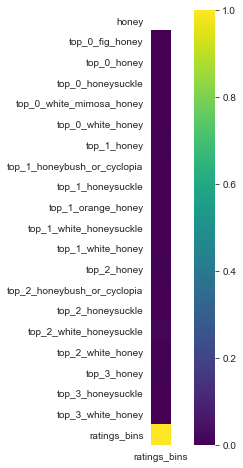

In [166]:
# Get correlation of variables
honey_corr = fragrance_df[honey_cols + ['ratings_bins']].corr()[['ratings_bins']]

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(honey_corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
plt.subplots(figsize = (8, 8))

sns.heatmap(honey_corr, mask = mask, square = True,
            cmap = 'viridis', annot = False, 
            vmin = -0, 
            vmax = 1);

# This code is taken with minor modifications from https://seaborn.pydata.org/generated/seaborn.heatmap.html and GA instructors

#### The correlation of these notes to the target is nil. As a next step in the future, I'll combine these to check on grouped notes' correlations.